In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [10]:
df.drop(columns=['Serial No.'], inplace=True)

In [12]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

(500, 8)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train.shape

(400, 7)

In [28]:
scaler = MinMaxScaler()

In [30]:
X_train_scaled = scaler.fit_transform(X_train)


In [60]:
X_test_scaled = scaler.transform(X_test)

In [32]:
X_train_scaled

array([[0.62      , 0.67857143, 0.5       , ..., 0.71428571, 0.65064103,
        1.        ],
       [0.52      , 0.67857143, 0.75      , ..., 1.        , 0.55769231,
        0.        ],
       [0.26      , 0.35714286, 0.5       , ..., 0.42857143, 0.54487179,
        0.        ],
       ...,
       [0.24      , 0.25      , 0.        , ..., 0.14285714, 0.14423077,
        0.        ],
       [0.38      , 0.46428571, 0.25      , ..., 0.71428571, 0.28205128,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.57142857, 0.46474359,
        0.        ]])

In [36]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [38]:
model = Sequential()

In [40]:
model.add(Dense(49,activation='relu',input_dim=7))
model.add(Dense(35,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(1,activation='linear'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 49)                392       
                                                                 
 dense_1 (Dense)             (None, 35)                1750      
                                                                 
 dense_2 (Dense)             (None, 14)                504       
                                                                 
 dense_3 (Dense)             (None, 1)                 15        
                                                                 
Total params: 2661 (10.39 KB)
Trainable params: 2661 (10.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [48]:
collback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [52]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 29ms/step - loss: 0.4240 - val_loss: 0.2739
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1602 - val_loss: 0.0587
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0225 - val_loss: 0.0156
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0189 - val_loss: 0.0142
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0091 - val_loss: 0.0078
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.0075
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0068 - val_loss: 0.0061
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0063 - val_loss: 0.0058
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 11

In [62]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [64]:
from sklearn.metrics import r2_score

In [66]:
r2_score(y_test,y_pred)

0.7962840615800925

In [68]:
import matplotlib.pyplot as plt

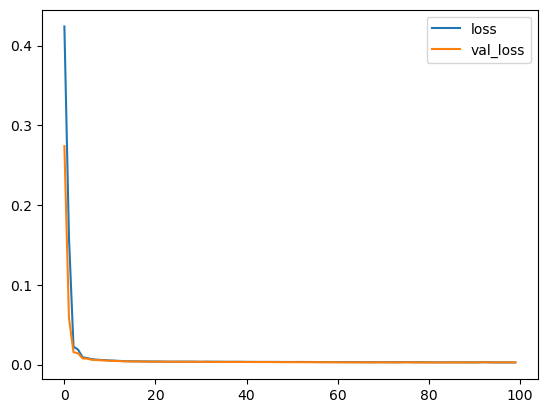

In [70]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()